# Project 1: Traveling in Candadian Metropolitan Areas

## 1. Overview

I have conducted an Exploratory Data Analysis on the data set of <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2410003001">Travel Survey of Residents of Canada</a>
 from <a href="https://www150.statcan.gc.ca/n1//en/type/data?MM=1">Statistics Canada</a> to understand the data structure, and find out answers to the following questions:
    
1. Top 10 destinations in 2017
2. Trends in domestic tourism spending and visitation in Canadian Metropolitan Areas from 2011 to 2017

In [86]:
#First, let's install a Python library with conda for reading data from Statistics Canada:
#conda install -c ian.e.preston stats_can

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stats_can import StatsCan

sc = StatsCan()

In [87]:
#Source: Table: 24-10-0030-01, Statistics Canada
data = sc.table_to_df("24-10-0030-01")

In [88]:
data.head()

,REF_DATE,GEO,DGUID,Visit duration,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Number of census metropolitan areas (CMA) visits,Number of visits,228,thousands,3,v88856249,1.1.1,1166.0,B,NaN,NaN,0
1,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Visits expenditures,Dollars,81,thousands,3,v88856250,1.1.2,324276.0,B,NaN,NaN,0
2,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,All census metropolitan areas (CMA) visits,Nights,Nights,225,thousands,3,v88856251,1.1.3,1776.0,B,NaN,NaN,0
3,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,Same day census metropolitan areas (CMA) visits,Number of census metropolitan areas (CMA) visits,Number of visits,228,thousands,3,v88856252,1.2.1,636.0,B,NaN,NaN,0
4,2011-01-01,"St. John's, Newfoundland and Labrador",2011S0503001,Same day census metropolitan areas (CMA) visits,Visits expenditures,Dollars,81,thousands,3,v88856253,1.2.2,61267.0,C,NaN,NaN,0


There are 1617 rows and 16 columns in the dataset and no missing values from REF_DATE to STATUS.

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 0 to 1616
Data columns (total 16 columns):
REF_DATE           1617 non-null datetime64[ns]
GEO                1617 non-null category
DGUID              1617 non-null category
Visit duration     1617 non-null object
Characteristics    1617 non-null object
UOM                1617 non-null category
UOM_ID             1617 non-null category
SCALAR_FACTOR      1617 non-null category
SCALAR_ID          1617 non-null category
VECTOR             1617 non-null category
COORDINATE         1617 non-null category
VALUE              1617 non-null float64
STATUS             1617 non-null category
SYMBOL             0 non-null category
TERMINATED         0 non-null category
DECIMALS           1617 non-null category
dtypes: category(12), datetime64[ns](1), float64(1), object(2)
memory usage: 112.7+ KB


## 1.1 Categorical Variables

#### Year

The dataset contains the years from 2011 to 2017. Please note that the year of 2017 was the 150th anniversary of Canada and <a href="https://www.nytimes.com/interactive/2017/travel/places-to-visit.html">The New York Times</a>  named Canada its top travel destination for 2017. Later we may explore and compare if there are any significant changes in the variables in the year.

In [90]:
data['YEAR'] = pd.DatetimeIndex(data['REF_DATE']).year

data['YEAR'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

#### Area

There are 33 census metropolitan areas (CMA) in Canada in the dataset. Do CMA include the three territories? Let's have a look as we are not 100% sure:

In [91]:
data['GEO'].nunique()

33

In [92]:
Territories = ['Yukon', ' Northwest', 'Nunavut']

len(data[data['GEO'].str.contains('|'.join(Territories), case = False)])

0

Now we are sure that the three territories are not included in CMA. Here is the province list in detail and there are ten in total.

In [93]:
data['GEO'].unique()

[St. John's, Newfoundland and Labrador, Halifax, Nova Scotia, Moncton, New Brunswick, Saint John, New Brunswick, Saguenay, Quebec, ..., Edmonton, Alberta, Kelowna, British Columbia, Abbotsford, British Columbia, Vancouver, British Columbia, Victoria, British Columbia]
Length: 33
Categories (33, object): [St. John's, Newfoundland and Labrador, Halifax, Nova Scotia, Moncton, New Brunswick, Saint John, New Brunswick, ..., Kelowna, British Columbia, Abbotsford, British Columbia, Vancouver, British Columbia, Victoria, British Columbia]

In [94]:
data['Province'] = data['GEO'].apply(lambda x: x.split(', ')[1])

data['Province'].nunique()

10

#### Characteristics

There’s three types of values here: number of visits, expenditures and nights.

In [95]:
data['Characteristics'].unique()

array(['Number of census metropolitan areas (CMA) visits',
       'Visits expenditures', 'Nights'], dtype=object)

#### Visit Duration

This data can be categorized by the type of visit: same-day, overnight, and the total. 

In [96]:
data['Visit duration'].unique()

array(['All census metropolitan areas (CMA)  visits',
       'Same day census metropolitan areas (CMA)  visits',
       'Overnight census metropolitan areas (CMA)  visits'], dtype=object)

## 1.2 Numerical Variables

#### Value

The VALUE variable has terrificly high standard deviation. If going back to check the table, we may find the VALUE is corresponding to the values in Characteristics and Visit duration and thus has different unit, which needs our further analysis.

In [97]:
data['VALUE'].describe()

count    1.617000e+03
mean     2.428424e+05
std      5.903349e+05
min      1.090000e+02
25%      1.621000e+03
50%      7.144000e+03
75%      2.026450e+05
max      5.568671e+06
Name: VALUE, dtype: float64

## 2. The questions I am curious about

### 2.1 Top 10 destinations visited by Canadian residents in 2017

The following bar plots illustrate that the top three cities visited by Canadian residents in 2017 for either overnight or same day trips are the same: Toronto, Montreal and Ottawa-Gatineau. 

The top 10 destinations for overnight trips are more diversified in locations than the destinations for same day trips. Five out of top 10 as overnight trip destinations are outside of Ontario and Quebec while only two out of ten as same day trip destinations are outside of the two provinces, that is, Vancouver and Edmonton.

In [196]:
data_overnight = data[(data['YEAR'] == 2017) &
                     (data['Visit duration'] == 'Overnight census metropolitan areas (CMA)  visits') &
                     (data['Characteristics'] == 'Number of census metropolitan areas (CMA) visits')]

top10_overnight = data_overnight.nlargest(10, ['VALUE']).reset_index()

data_SameDay = data[(data['YEAR'] == 2017) &
                    (data['Visit duration'] == 'Same day census metropolitan areas (CMA)  visits') &
                    (data['Characteristics'] == 'Number of census metropolitan areas (CMA) visits')]

top10_SameDay = data_SameDay.nlargest(10, ['VALUE']).reset_index()


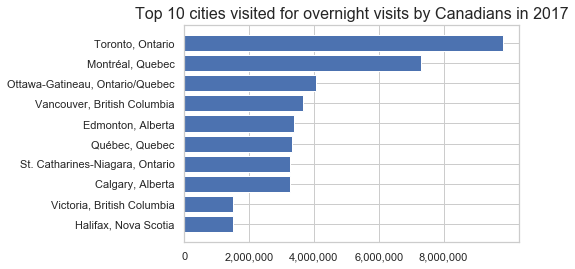

In [197]:
Value, City = zip(*sorted(zip(top10_overnight.VALUE*1000, top10_overnight.GEO)))
plt.barh(City, Value)

plt.title('Top 10 destinations visited for overnight visits by Canadians in 2017', fontsize = 16)
plt.xticks(np.arange(0, 10000000, 2000000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

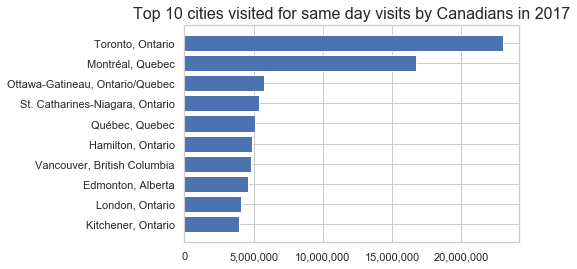

In [200]:
Value, City = zip(*sorted(zip(top10_SameDay.VALUE*1000, top10_SameDay.GEO)))
plt.barh(City, Value)

plt.title('Top 10 destinations visited for same day visits by Canadians in 2017', fontsize = 16)
plt.xticks(np.arange(0, 25000000, 5000000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Insterestingly, the eight destinations for the same day visits are connected by VIA Rail as part of the Québec City–Windsor Corridor. Definitely, the Corridor railway provided convenience to the same day visitors.

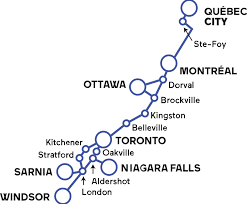

<center>Source: VIA Rail Canada</center>

### 2.2 Top 10 destinations visited for spending by Canadian residents in 2017